<a href="https://colab.research.google.com/github/RupaChanda/Jewelry-Sales_Analysis/blob/main/Jewelry_Sales_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Import libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Step 2: Load the data**

In [7]:
df= pd.read_csv('dataset_6_Jewelry Sales.csv')
output=[] #List to store output result
output.append("Exploratory Data Analysis of Jewelry Sales\n")
output.append("=================================\n")

# **Step 3: Explore the data**

In [8]:
print(df.head()) #Display the first few rows
output.append(f"First few rows:\n{df.head()}\n")

         Date    Product Region Customer_Type  Quantity    Price  Discount  \
0  2024-05-17      Rings  South    Occasional         7  8485.67      0.19   
1  2024-06-23  Necklaces   East       Regular         9  9030.40      0.03   
2  2024-12-16   Earrings  North       Regular         4  9208.90      0.06   
3  2024-08-08      Rings   West       Regular         5  6668.87      0.16   
4  2024-07-13  Necklaces  North    Occasional         8  6543.42      0.27   

    Revenue  
0  48113.75  
1  78835.39  
2  34625.46  
3  28009.25  
4  38213.57  


In [9]:
#Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [10]:
print(df.describe()) #Summary statistics
output.append(f"Summary Statistics:\n{df.describe()}\n")

          Quantity        Price    Discount       Revenue
count  1000.000000  1000.000000  1000.00000   1000.000000
mean      5.549000  5129.977450     0.15288  24490.188110
std       2.883733  2843.922425     0.08651  20361.526831
min       1.000000    84.480000     0.00000     78.560000
25%       3.000000  2709.445000     0.08000   7440.797500
50%       6.000000  5128.155000     0.16000  18894.550000
75%       8.000000  7664.345000     0.23000  36473.287500
max      10.000000  9996.860000     0.30000  98171.900000


# **Step 4: Clean the data**

In [15]:
output.append("Data Cleaning Result:\n")
#Cheak for missing values
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing Values:\n{missing_values}\n")

# Fill or drop missing values as necessary
df.dropna(inplace=True) #Drop rows with missing values

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [16]:
# Check for duplicates
duplicates= df.duplicated().sum()
output.append(f"Number of duplicates Dropped {duplicates}\n")
df.drop_duplicates(inplace=True) #Drop duplicate rows

# **Step 5: Analyze the data**

In [22]:
# Total revenue from Jewelry Sales
Total_revenue= df['Revenue'].sum()
output.append(f"Total revenue: ${Total_revenue}\n")
print(f'Total revenue : ${Total_revenue}')

Total revenue : $24490188.11


In [25]:
# average price per customer_Type wise
average_price_per_service= df.groupby('Customer_Type')['Price'].mean()
output.append("Average price per customer_Type:\n")
output.append(f"{average_price_per_service}\n")
print(average_price_per_service)

Customer_Type
Occasional    5058.860588
Regular       5199.130533
Name: Price, dtype: float64
Region
North    265
West     255
South    244
East     236
Name: count, dtype: int64


In [26]:
# Total services provided by region
total_services_by_region= df['Region'].value_counts()
output.append("Total services provided by region:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)

Region
North    265
West     255
South    244
East     236
Name: count, dtype: int64


In [27]:
# Tatal revenue by region
revenue_by_region= df.groupby('Region')['Price'].sum()
output.append("Total revenue by region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     1230830.43
North    1391777.41
South    1221012.94
West     1286356.67
Name: Price, dtype: float64


# **Step 6: Visualize the data**

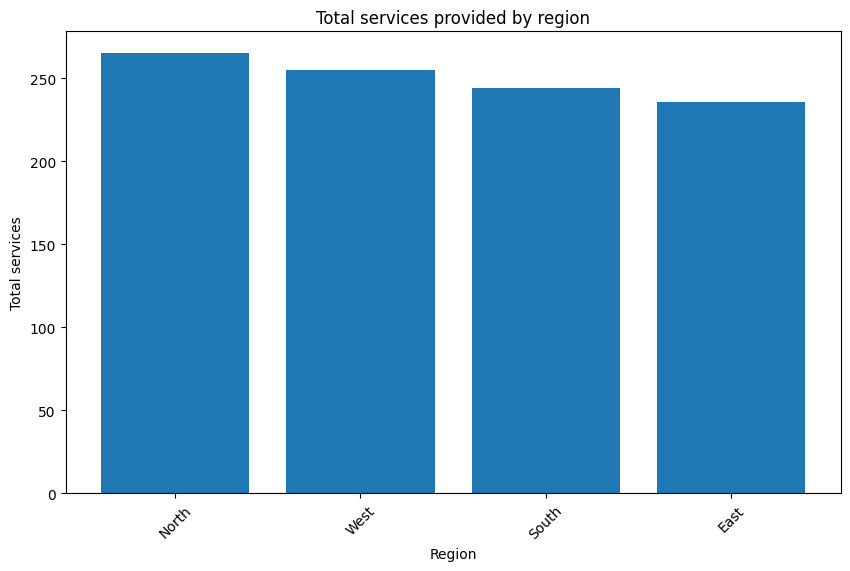

In [28]:
plt.figure(figsize=(10,6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total services provided by region')
plt.xlabel('Region')
plt.ylabel('Total services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')
plt.show()

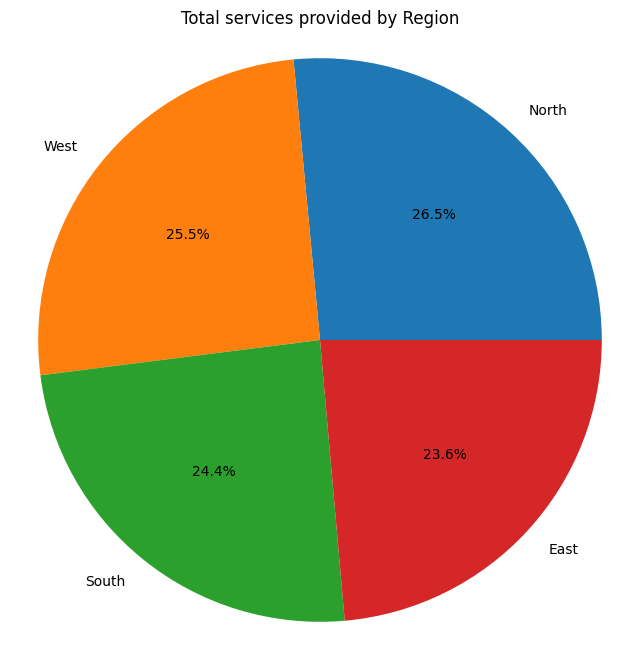

In [32]:
# Pie chart for total services by region
plt.figure(figsize=(8,8))
plt.pie(total_services_by_region.values, labels=total_services_by_region.index, autopct='%1.1f%%')
plt.title('Total services provided by Region')
plt.axis('equal')
plt.savefig('total_services_by_region_pie.png')
plt.show()

In [ ]:
# Bar plot of average price per service type
plt.figure(figsize=(10,6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average price per Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png') # Save the figure
plt.show()

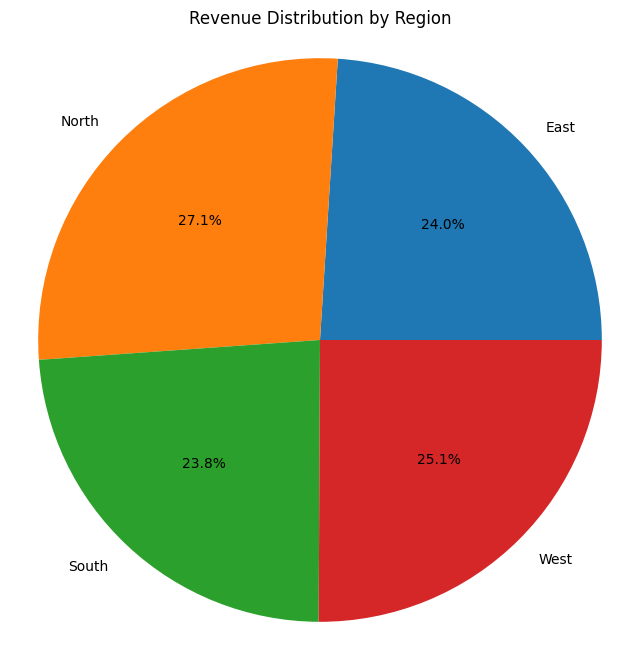

In [36]:
# Pie chart for revenue by service type
plt.figure(figsize=(8,8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Region')
plt.axis('equal')
plt.savefig('revenue_distribution_by_region_pie.png') # Save the figure
plt.show()


Save Output in File

In [37]:
# save output to a text file
with open('analysis_output.txt', 'w') as f:
    f.writelines(output)